In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('bitcoindata.csv',header=0)
headers = ['length','weight','count','looped','neighbours','income','label']
data.columns = headers 
data.to_csv('bitcoindata1.csv')
print(data.head())

   length    weight  count  looped  neighbours       income  label
0      18  0.008333      1       0           2  100050000.0      0
1      44  0.000245      1       0           1  100000000.0      0
2       0  1.000000      1       0           2  200000000.0      0
3      73  0.003906      1       0           2   71200000.0      0
4     144  0.072848    456       0           1  200000000.0      0


In [3]:
miss = data.isnull().sum()/len(data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Series([], dtype: float64)

<AxesSubplot:>

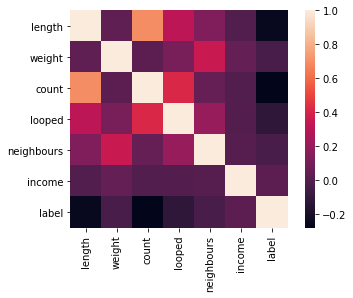

In [4]:
#separate variables into new data frames
numeric_data = data.select_dtypes(include=[np.number])
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr, square=True)

C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


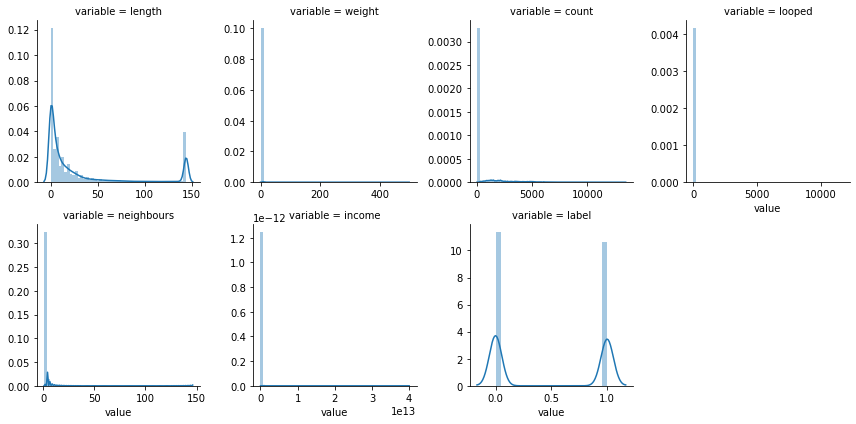

In [5]:
num = [f for f in data.columns if data.dtypes[f] != 'object']
nd = pd.melt(data, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [6]:
X= np.array(data.drop(["label"], axis=1))
print(X)

y=np.array(data["label"])
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

[[1.8000000e+01 8.3333330e-03 1.0000000e+00 0.0000000e+00 2.0000000e+00
  1.0005000e+08]
 [4.4000000e+01 2.4500000e-04 1.0000000e+00 0.0000000e+00 1.0000000e+00
  1.0000000e+08]
 [0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 2.0000000e+00
  2.0000000e+08]
 ...
 [0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
  1.0000000e+08]
 [1.4000000e+01 3.3653846e-02 2.8000000e+01 0.0000000e+00 1.0000000e+00
  4.3200000e+09]
 [6.0000000e+00 6.2500000e-02 1.0000000e+00 0.0000000e+00 2.0000000e+00
  1.9100000e+09]]
[0 0 0 ... 1 1 1]


In [7]:
model = RandomForestClassifier(max_depth=5, random_state=0)
model.fit(X_train, y_train)

RndF_pred = model.predict(X_test)
accuracy_score(y_test, RndF_pred)

0.83125

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test, RndF_pred )) 
print(confusion_matrix(y_test, RndF_pred)) 
print(accuracy_score(y_test, RndF_pred)) 

              precision    recall  f1-score   support

           0       0.79      0.92      0.85     10380
           1       0.89      0.74      0.81      9620

    accuracy                           0.83     20000
   macro avg       0.84      0.83      0.83     20000
weighted avg       0.84      0.83      0.83     20000

[[9536  844]
 [2531 7089]]
0.83125


Confusion matrix (Without Normalization)
[[9536  844]
 [2531 7089]]
Confusion Matrix (With Normalization)
[[0.91868979 0.08131021]
 [0.26309771 0.73690229]]


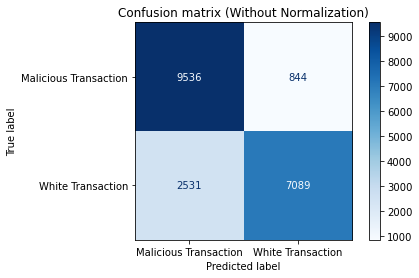

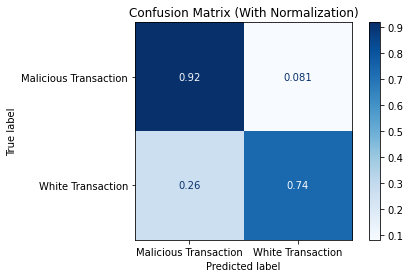

In [9]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix (Without Normalization)", None),
                  ("Confusion Matrix (With Normalization)", 'true')]
class_names = ['Malicious Transaction', 'White Transaction']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                  display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [11]:
import pickle

In [12]:
pickle.dump(model, open('model.pkl','wb'))

In [13]:
model = pickle.load(open('model.pkl','rb'))


In [19]:
X = [['18','0.008333','1', '0' ,'2'  ,'100050000.0']]
X = model.predict(X)
print(X)

[0]


In [20]:
print(data.tail())

       length    weight  count  looped  neighbours        income  label
79994      26  0.008789      3       0           3  1.760000e+09      1
79995       2  1.000000      1       0           2  2.430000e+10      1
79996       0  1.000000      1       0           1  1.000000e+08      1
79997      14  0.033654     28       0           1  4.320000e+09      1
79998       6  0.062500      1       0           2  1.910000e+09      1


In [21]:
X = [['17','1.000000','4', '0' ,'2'  ,'3.430000e+10']]
X = model.predict(X)
print(X)

[1]
